Prediction if a customer will purchase a car based on their gender, age and salary

In [1]:
# Importing necessary Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
# Importing our data
car_dataset = pd.read_csv('car_data.csv')

In [3]:
# Purchased decision (No = 0; Yes = 1)
# Our target variable Purchase is in 0,1 so wont be encoded, but may scale independent variable
car_dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
# make a copy
car_dataset1 = car_dataset.copy()

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [6]:
# checking for null values
car_dataset.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [7]:
# describing the dataset in horizontal orientation
car_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,40.106,10.707073,18.0,32.00,40.0,48.00,63.0
AnnualSalary,1000.0,72689.000,34488.341867,15000.0,46375.00,72000.0,90000.00,152500.0
Purchased,1000.0,0.402,0.490547,0.0,0.00,0.0,1.00,1.0


In [8]:
# Looking at gender
# Using Label encoder to encode Gender into 0,1 since its in object dtype
car_dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
# encoding Gender to fit between 0-1 
le = LabelEncoder() # instantiate the encoder
le_car_dataset = le.fit_transform(car_dataset['Gender']) # fit labelEncoder on dataset

In [11]:
# converting the encoded numpy data back into a DataFrame and reassign new column name

le_car_dataset_new = pd.DataFrame(le_car_dataset, columns=['GenderNew'])

In [12]:
le_car_dataset_new

,GenderNew
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,0
997,0
998,0


In [13]:
car_dataset
# concatenating the new column to our dataset

car_dataset = pd.concat([car_dataset, le_car_dataset_new], axis = 1)
car_dataset

,User ID,Gender,Age,AnnualSalary,Purchased,GenderNew
0,385,Male,35,20000,0,1
1,681,Male,40,43500,0,1
2,353,Male,49,74000,0,1
3,895,Male,40,107500,1,1
4,661,Male,25,79000,0,1
...,...,...,...,...,...,...
995,863,Male,38,59000,0,1
996,800,Female,47,23500,0,0
997,407,Female,28,138500,1,0
998,299,Female,48,134000,1,0


In [14]:
# dropping the Gender column since its no longer needed
car_dataset.drop(['Gender'], axis = 1, inplace = True)

In [15]:
car_dataset

,User ID,Age,AnnualSalary,Purchased,GenderNew
0,385,35,20000,0,1
1,681,40,43500,0,1
2,353,49,74000,0,1
3,895,40,107500,1,1
4,661,25,79000,0,1
...,...,...,...,...,...
995,863,38,59000,0,1
996,800,47,23500,0,0
997,407,28,138500,1,0
998,299,48,134000,1,0


In [16]:
# plt.figure(dpi=120) # size
#sns.heatmap(car_dataset.corr(), annot = True) # diagram
# Age seem to have the best positive corelation with Purchased

Building our Model

In [17]:
# Splitting the dataset to independent variable X and target or dependent variable Y
X = car_dataset.drop('Purchased', axis = 1)
y = car_dataset['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 )

In [18]:
X_train

,User ID,Age,AnnualSalary,GenderNew
541,582,50,29500,1
440,169,47,107000,0
482,430,42,75000,0
422,31,28,59500,0
778,359,48,47500,0
...,...,...,...,...
106,398,36,56500,1
270,35,42,53000,0
860,626,37,33000,0
435,931,43,112000,0


Scaling our independent variables X

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the dataset to fit between 0-1 or 0-100
my_scaler = MinMaxScaler() # instantiate the scaler
X_train_scaled = my_scaler.fit_transform(X_train) # fit scaler on dataset
X_test_scaled = my_scaler.fit_transform(X_test) # fit scaler on dataset

# the transformed data (X_train_scaled and X_test_scaled) is a NumPy array and does not have column names
# To preserve the column structure of the original pandas DataFrame (X_train and X_test)
# we need to convert the scaled data back into a DataFrame and reassign the column names

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [20]:
# Instantiating the model
# for classification, default argument is gini but can also be entropy (information gain)
my_model = tree.DecisionTreeClassifier(criterion= 'gini')

In [21]:
# fit the model on the X_train and y_train dataset
my_model.fit(X_train_scaled, y_train)



DecisionTreeClassifier()

In [22]:
my_model.score(X_train_scaled, y_train)

1.0

In [23]:
# predicting target value of y_pred to compare with true value y_test
y_pred = my_model.predict(X_test_scaled)

Testing our model performance



Text(91.68, 0.5, 'y_pred')

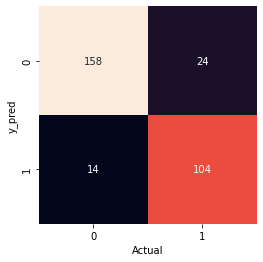

In [26]:
# Purchased decision (No = 0; Yes = 1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
names = np.unique(y_pred)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=names, yticklabels=names)
plt.xlabel('Actual')
plt.ylabel('y_pred')

In [27]:
# Rows: Represent the actual class labels (Actual).
# Columns: Represent the predicted class labels (y_pred).
# 158 (Top-left, True Negative): The model correctly predicted "Not Faulty" for 158 cars.
# 24 (Top-right, False Positive): The model incorrectly predicted "Faulty" when the car was actually "Not Faulty."
# 14 (Bottom-left, False Negative): The model incorrectly predicted "Not Faulty" when the car was actually "Faulty."
# 104 (Bottom-right, True Positive): The model correctly predicted "Faulty" for 104 cars.

In [30]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

Model Deployment

In [33]:
# Accuracy and classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       172
           1       0.88      0.81      0.85       128

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [34]:
print(accuracy_score(y_test, y_pred))

0.8733333333333333


In [ ]:
# Complexity Prunning is to improve model performance by selecting the Alphas in the dataset